In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

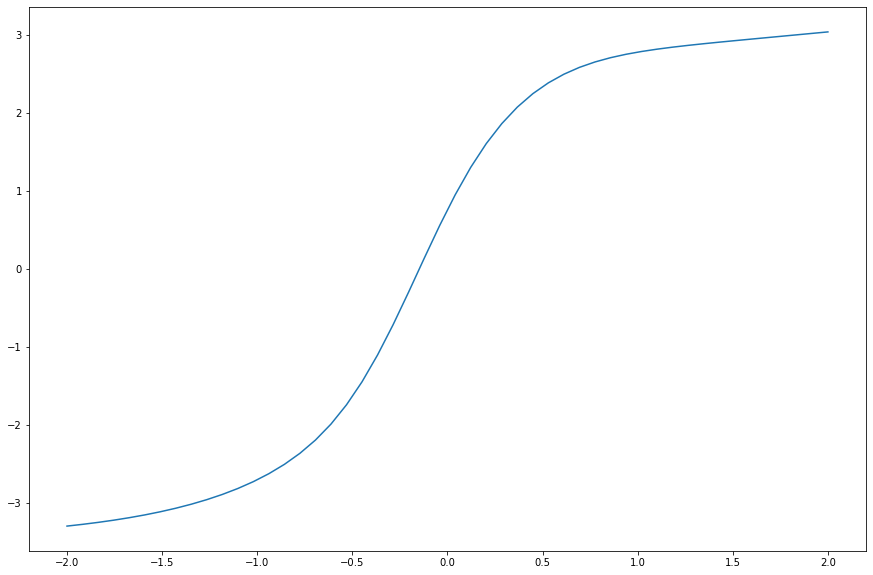

In [64]:
#Create 50 independet MLPs with 1 hidden layer of 10 neurons and 1 output neuron
#seed the random number generator
def MLP_1(x,n):
    '''Compute Output for MLP with 1 hidden layer of 10 neurons and 1 output neuron'''
    #initialize weights
    #seed the random number generator
    np.random.seed(10)
    w21 = np.random.normal(0, 1, (10, 1))
    w10 = np.random.normal(0, n, (10, 1))
    w20 = np.random.uniform(-2, 2, (10, 1))
    
    #Compute input for first hidden layer
    h = w10@x - w20
    #Compute activation for hidden layer
    f_h = np.tanh(h)
    #Compute output
    output = w21.T@f_h
    
    return output
    
    
x = np.linspace(-2,2,50).reshape(50,1)

#Add column for outputs
input_output1 = np.append(x, np.zeros((50,1)), axis=1)
input_output2 = np.append(x, np.zeros((50,1)), axis=1)

for i in range(len(x)):
    output1 = MLP_1(x[i].reshape(1,1),2)
    output2 = MLP_1(x[i].reshape(1,1),0.5)
    input_output1[i,1] = output1
    input_output2[i,1] = output2

#Plot the output for the 50 MLPs with N(0,2)
f1 = plt.figure(figsize=(15,10))
plt.plot(input_output1[:,0], input_output1[:,1])

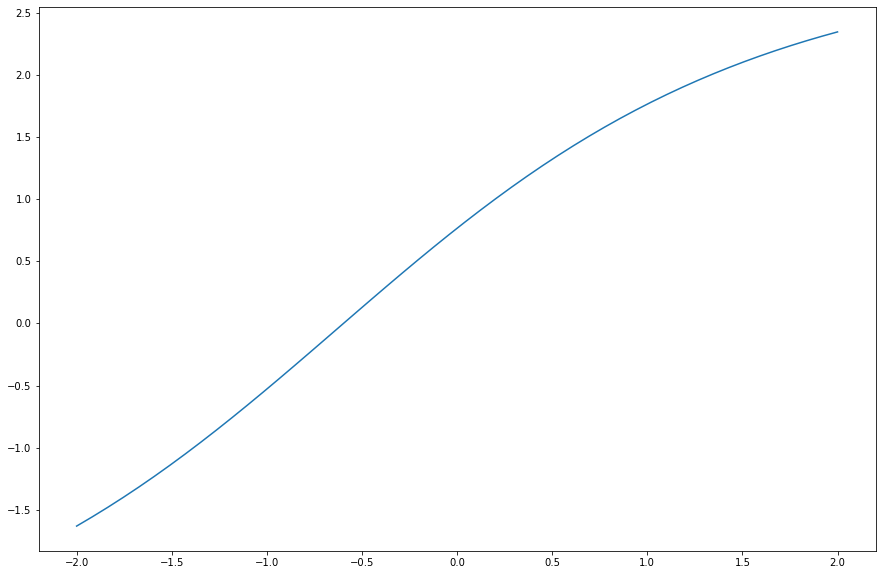

In [65]:
#Plot the output for the 50 MLPs with N(0,0.5)
f2 = plt.figure(figsize=(15,10))
plt.plot(input_output2[:,0], input_output2[:,1])

*Compute the mean squared error (MSE) between each of these 2 × 50 (50 from each of the above two initialization procedures) input-output functions and the function g(x) = −x. For each of the two initialization procedures, which MLP approximates g best? Plot y(x) vs. x for these two MLPs
*

In [66]:
compare = np.append(input_output1, input_output2, axis=1)
compare = compare[:,[0,1,3]]
g_function = compare[:,0]*-1
compare = np.append(compare, g_function.reshape(50,1), axis=1)

#Matrix with x, MLP1, MLP2, g(x)
compare

from sklearn.metrics import mean_squared_error

#Compute MSE
mse1 = mean_squared_error(compare[:,1], compare[:,3])
mse2 = mean_squared_error(compare[:,2], compare[:,3])

#Second input-output pair has lower MSE, so it is a better approximation of the g function

print(f'MES1 (N(0,2)): {mse1}')
print(f'MES2 (N(0,0.5)): {mse2}')


MES1 (N(0,2)): 13.726157734498349
MES2 (N(0,0.5)): 6.305264239223619


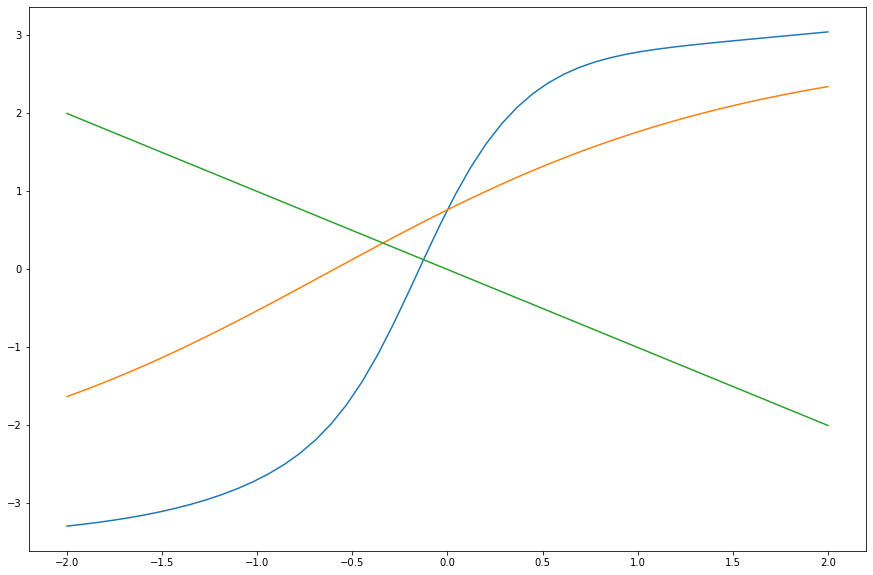

In [67]:
f2 = plt.figure(figsize=(15,10))

plt.plot(input_output1[:,0], input_output1[:,1])
plt.plot(input_output2[:,0], input_output2[:,1])
plt.plot(compare[:,0], compare[:,3])